In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.decomposition import PCA

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
file_path = '/content/data.csv'

In [17]:
data = pd.read_csv(file_path)

In [18]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [19]:
X = data.drop(columns=['hsi_id', 'vomitoxin_ppb'])

In [20]:
y = data['vomitoxin_ppb']

In [21]:
scaler = StandardScaler()

In [22]:
X_scaled = scaler.fit_transform(X)

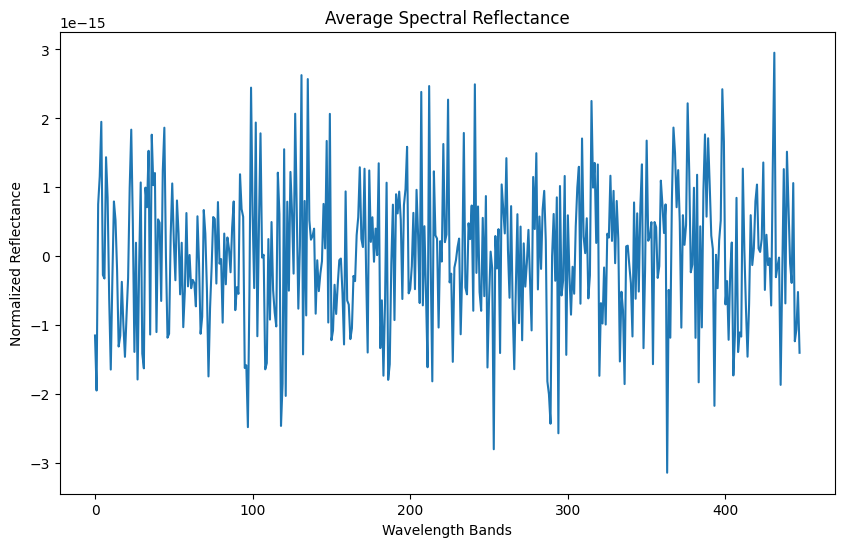

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(np.mean(X_scaled, axis=0))
plt.title('Average Spectral Reflectance')
plt.xlabel('Wavelength Bands')
plt.ylabel('Normalized Reflectance')
plt.show()

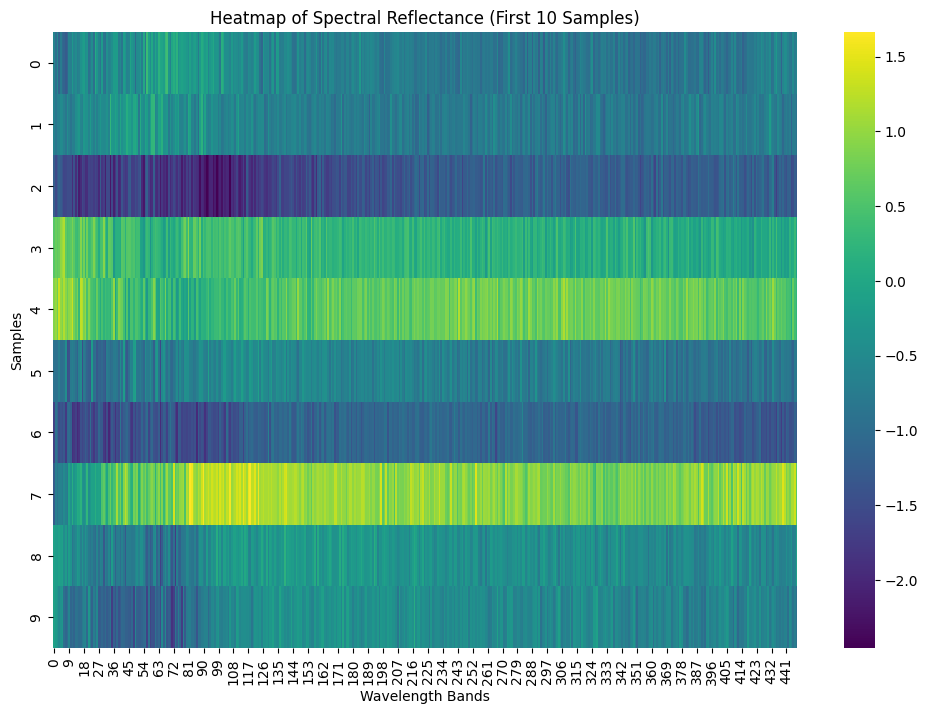

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled[:10, :], cmap='viridis')
plt.title('Heatmap of Spectral Reflectance (First 10 Samples)')
plt.xlabel('Wavelength Bands')
plt.ylabel('Samples')
plt.show()

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [26]:
print(f"Explained variance by top 2 components: {pca.explained_variance_ratio_}")

Explained variance by top 2 components: [0.87077909 0.05849069]


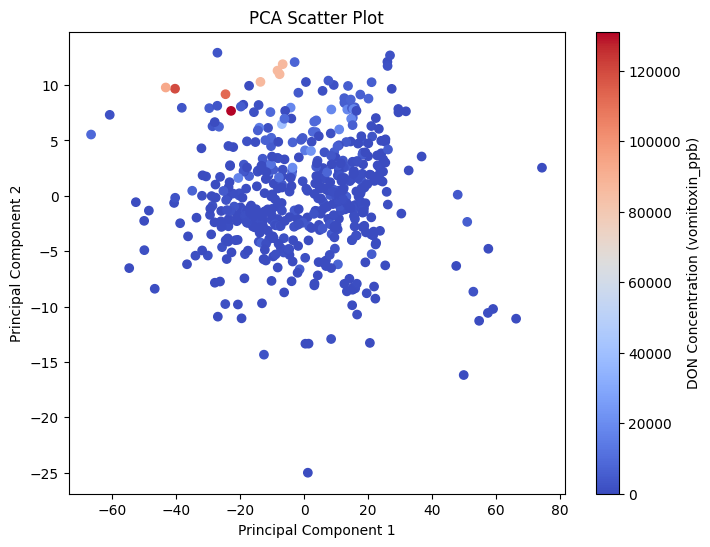

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.colorbar(label='DON Concentration (vomitoxin_ppb)')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = rf.predict(X_test)

In [31]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 3765.0568
Root Mean Squared Error (RMSE): 11483.805982806223
R² Score: 0.5282211884116356


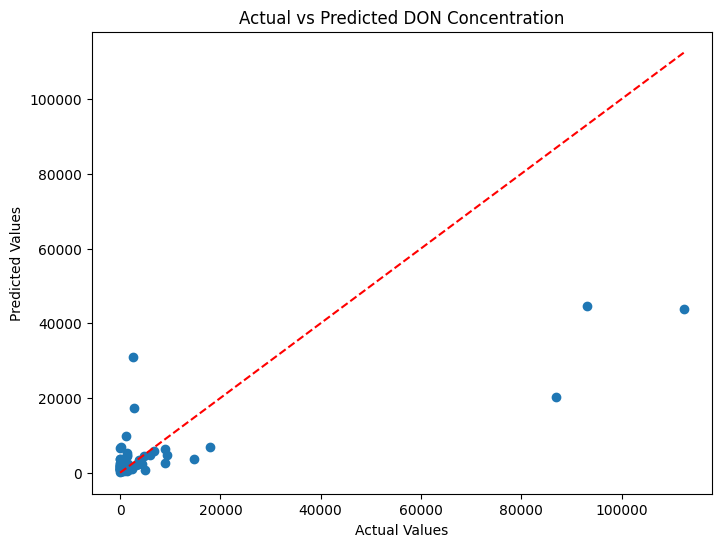

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted DON Concentration')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()